## LOADING IRIS DATA

In [209]:
from sklearn import datasets

In [210]:
import numpy as np

In [211]:
iris=datasets.load_iris()

In [212]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [213]:
X=iris.data[:,[2,3]]

In [214]:
y=iris.target

In [215]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [216]:
np.unique(y)

array([0, 1, 2])

## SPLITTING DATA

In [217]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [218]:
len(y)

150

In [219]:
len(X_train)

105

In [220]:
type(X)

numpy.ndarray

In [221]:
len(y_test)

45

## STANDARDIZING THE FEATURES

In [222]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(X_train)

X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [223]:
X_test_std[1:5,]

array([[ 0.1 , -0.29],
       [-1.35, -1.32],
       [ 1.38,  0.74],
       [-1.3 , -1.32]])

## PERCEPTRON

In [224]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=0)

ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [225]:
#training score/accuracy
ppn.score(X_train_std,y_train)

0.90476190476190477

In [226]:
ppn.fit.im_self

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [227]:
y_pred=ppn.predict(X_test_std)

In [228]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.91111111111111109

In [229]:
#testing score/accuracy
ppn.score(X_test_std,y_test)

0.91111111111111109

In [230]:
print('The accuracy of model is {0:.2f}'.format(accuracy_score(y_test,y_pred)))

The accuracy of model is 0.91


In [231]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## LOGISTIC REGRESSION

0.977777777778


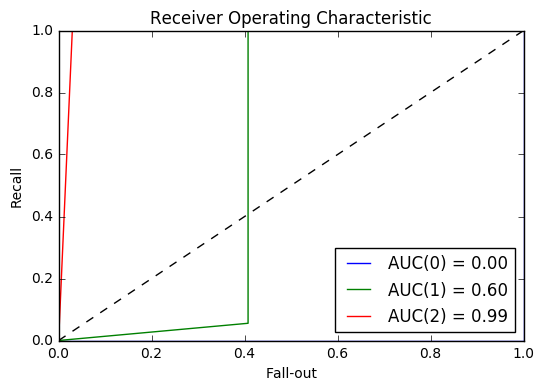

In [232]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1000.0,random_state=0)

lr.fit(X_train_std,y_train)

#y_pred=lr.predict_proba(X_test_std)   --this gives the probabilities
y_pred=lr.predict(X_test_std)

print(accuracy_score(y_test,y_pred))


from sklearn.metrics import auc,roc_curve

for label in np.arange(3):
    false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred, pos_label=label)
    roc_auc = auc(false_positive_rate, recall)
    plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.2f' % (label, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()



In [233]:
#training score
lr.score(X_test_std,y_test)

0.97777777777777775

In [234]:
np.arange(3)

array([0, 1, 2])

In [235]:
false_positive_rate

array([ 0.  ,  0.03,  0.53,  1.  ])

In [236]:
recall

array([ 0.,  1.,  1.,  1.])

In [237]:
thresholds

array([3, 2, 1, 0])

## REGULARIZATION - CLASSIFICATION

In [238]:
weights, params=[],[]

In [239]:
for c in np.arange(-5,5):
    lr=LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)


In [240]:
weights=np.array(weights)
weights

array([[  6.56e-05,   3.27e-05],
       [  6.54e-04,   3.25e-04],
       [  6.32e-03,   3.03e-03],
       [  4.88e-02,   1.62e-02],
       [  2.39e-01,  -6.65e-02],
       [  1.06e+00,  -8.42e-01],
       [  2.19e+00,  -1.98e+00],
       [  2.51e+00,  -2.30e+00],
       [  2.54e+00,  -2.34e+00],
       [  2.55e+00,  -2.35e+00]])

In [241]:
lr.score(X_train_std,y_train)

0.96190476190476193

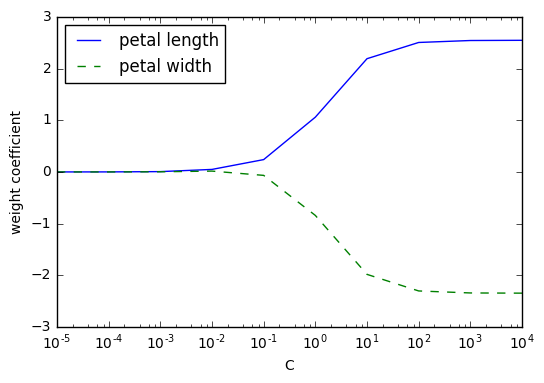

In [242]:
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [243]:
lr.coef_

array([[-9.39, -8.62],
       [ 2.55, -2.35],
       [ 9.83,  6.51]])

In [244]:
lr.intercept_

array([-12.24,  -0.89,  -9.11])

## SUPPORT VECTOR MACHINES CLASSIFICATION

https://chrisalbon.com/machine-learning/svc_parameters_using_rbf_kernel.html

In [245]:
#linear SVM                                                                                                                                 

from sklearn.svm import SVC

svm=SVC(kernel='linear',C=1.0,random_state=0)                                                           

svm.fit(X_train_std, y_train)

y_pred=svm.predict(X_test_std)

accuracy_score(y_test,y_pred)

0.97777777777777775

In [246]:
# non linear SVM (low gamma)

from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=1.0,gamma=0.2,random_state=0)                                                           

svm.fit(X_train_std, y_train)

y_pred=svm.predict(X_test_std)

accuracy_score(y_test,y_pred)



0.97777777777777775

In [247]:
# non linear SVM (high gamma) - leads to overfitting

from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=1.0,gamma=100.0,random_state=0)                                                           

svm.fit(X_train_std, y_train)

y_pred=svm.predict(X_test_std)

accuracy_score(y_test,y_pred)


0.80000000000000004

## DESCISION TREE CLASSIFICATION

In [248]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

tree.fit(X_train,y_train)

y_pred=tree.predict(X_test)

accuracy_score(y_test,y_pred)

0.97777777777777775

In [249]:
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file='tree.dot',feature_names=['petal length', 'petel width'])

## RANDOM FOREST CLASSIFICATION

In [250]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(criterion='entropy',
                              n_estimators=10,
                              random_state=1,
                              n_jobs=2)

forest.fit(X_train,y_train)

y_pred=forest.predict(X_test)

accuracy_score(y_test,y_pred)


0.9555555555555556

## KNN CLASSIFICATION

In [251]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")

knn.fit(X_train_std,y_train)

y_pred=knn.predict(X_test_std)

accuracy_score(y_test,y_pred)

1.0

## HANDLING CATEGORICAL DATA

In [252]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [253]:
#mapping ordinal features

size_mapping={'XL':3,
              'L':2,
              'M':1}

df['size']=df['size'].map(size_mapping)
df

df1=df[:]
df1

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [254]:
#inverse mapping of ordinal features

inv_size_mapping={v:k for k,v in size_mapping.items()}
inv_size_mapping

df['size']=df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [255]:
#encoding class labels

class_mapping={label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping



{'class1': 0, 'class2': 1}

In [256]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [257]:
#one hot encoding

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

X=df1[['color','size','price']].values

label_encoder=LabelEncoder()

X[:,0]=label_encoder.fit_transform(X[:,0])

X


array([[1L, 1L, 10.1],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

In [258]:
#dense numpy array as o/p
ohe=OneHotEncoder(categorical_features=[0])

ohe.fit_transform(X).toarray()


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [259]:
#dense numpy array as o/p
ohe1=OneHotEncoder(categorical_features=[0],sparse=False)

ohe1.fit_transform(X)


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [260]:
#sparse numpy array as o/p
ohe.fit_transform(X)

<3x5 sparse matrix of type '<type 'numpy.float64'>'
	with 9 stored elements in COOrdinate format>

In [261]:
pd.get_dummies(df1[['color','size','price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0.0,1.0,0.0
1,2,13.5,0.0,0.0,1.0
2,3,15.3,1.0,0.0,0.0


## FEATURE SELECTION


In [262]:
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine = pd.read_csv('wine.txt', sep=',',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [263]:
from sklearn.cross_validation import train_test_split

X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [264]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=10000,
                              random_state=0,
                              n_jobs=-1)

forest.fit(X_train,y_train)

print forest.score(X_train,y_train)

y_pred=forest.predict(X_test)

print accuracy_score(y_test,y_pred)


1.0
0.981481481481


In [265]:
importances=forest.feature_importances_
importances

array([ 0.11,  0.03,  0.01,  0.03,  0.02,  0.06,  0.15,  0.01,  0.02,
        0.18,  0.08,  0.13,  0.16])

In [266]:
indices=np.argsort(importances)[::-1]

In [267]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2], dtype=int64)

In [268]:
importances[indices]

array([ 0.18,  0.16,  0.15,  0.13,  0.11,  0.08,  0.06,  0.03,  0.03,
        0.02,  0.02,  0.01,  0.01])

In [269]:
labels=df_wine.columns[1:]
labels

Index([u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash', u'Magnesium',
       u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')

In [270]:

    

    
    
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, labels[indices[f]], importances[indices[f]]))
    


1. Color intensity (0.182483)
2. Proline (0.158610)
3. Flavanoids (0.150948)
4. OD280/OD315 of diluted wines (0.131987)
5. Alcohol (0.106589)
6. Hue (0.078243)
7. Total phenols (0.060718)
8. Alcalinity of ash (0.032033)
9. Malic acid (0.025400)
10. Proanthocyanins (0.022351)
11. Magnesium (0.022078)
12. Nonflavanoid phenols (0.014645)
13. Ash (0.013916)


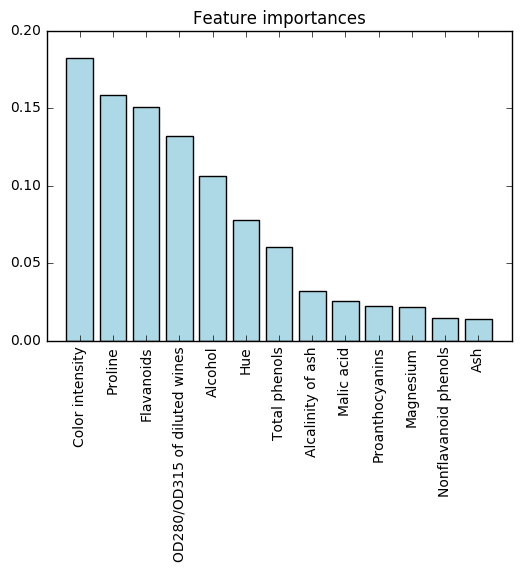

In [271]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="lightblue", align="center")
plt.xticks(range(X_train.shape[1]), labels[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## UNSUPERVISED DIMENSIONALITY REDUCTION VIA PCA

In [272]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()


In [273]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

In [274]:
#PCA with logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
lr=LogisticRegression()

X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.fit_transform(X_test_std)

lr.fit(X_train_pca,y_train)

print lr.score(X_train_pca,y_train)

y_pred=lr.predict(X_test_pca)

print accuracy_score(y_test,y_pred)

0.991935483871
0.907407407407


In [275]:
pca.explained_variance_ratio_

array([ 0.34,  0.21,  0.12,  0.1 ,  0.07,  0.05,  0.03,  0.02,  0.02,
        0.02,  0.01,  0.01,  0.01])

In [276]:
import seaborn as sns

ax=sns.barplot(x=range(1,len(pca.explained_variance_ratio_)+1),y=pca.explained_variance_ratio_)
ax.set(xlabel='principal components', ylabel='individual explained variance')

ImportError: No module named seaborn

In [277]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.34,  0.55,  0.67,  0.77,  0.84,  0.88,  0.92,  0.94,  0.95,
        0.97,  0.98,  0.99,  1.  ])

In [278]:
ax=sns.barplot(x=range(1,len(pca.explained_variance_ratio_)+1),y=np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='principal components', ylabel='cummulative explained variance')

NameError: name 'sns' is not defined

## SUPERVISED DATA COMPRESSION VIA LDA

In [279]:
#LDA with logistic regression

from sklearn.lda import LDA
from sklearn.linear_model import LogisticRegression


lda=LDA(n_components=None,solver='eigen')
lr=LogisticRegression()

X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)

lr.fit(X_train_lda,y_train)

print lr.score(X_train_lda,y_train)

y_pred=lr.predict(X_test_lda)

print accuracy_score(y_test,y_pred)

1.0
1.0


In [280]:
lda.explained_variance_ratio_

array([  7.38e-01,   2.62e-01,   2.51e-16,   1.53e-16,   1.34e-16,
         7.03e-17,   6.12e-17,   2.83e-17,  -4.41e-18,  -3.08e-17,
        -3.61e-17,  -6.87e-17,  -2.58e-16])

In [281]:
sum(lda.explained_variance_ratio_)

1.0000000000000002

In [282]:
ax=sns.barplot(x=range(1,len(lda.explained_variance_ratio_)+1),y=lda.explained_variance_ratio_)
ax.set(xlabel='linear discriminants', ylabel='individual discriminability')

NameError: name 'sns' is not defined

In [283]:
ax=sns.barplot(x=range(1,len(lda.explained_variance_ratio_)+1),y=np.cumsum(lda.explained_variance_ratio_))
ax.set(xlabel='linear discriminants', ylabel='cummulative discriminability')

NameError: name 'sns' is not defined

In [285]:
#LDA for classification

from sklearn.lda import LDA

lda=LDA(n_components=None,solver='svd')

X_train_lda=lda.fit(X_train_std,y_train)

print lda.score(X_train_std,y_train)

y_pred=lda.predict(X_test_std)

print accuracy_score(y_test,y_pred)

1.0
0.981481481481


## USING KERNEL PCA FOR NONLINEAR MAPPINGS

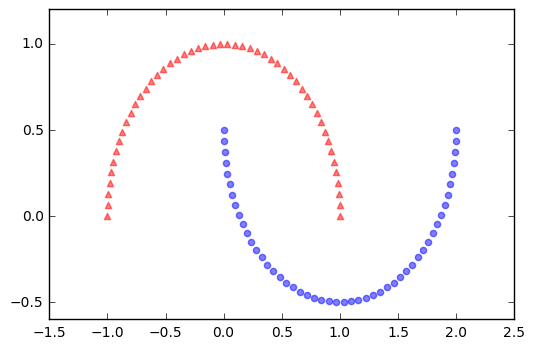

In [286]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,random_state=123)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

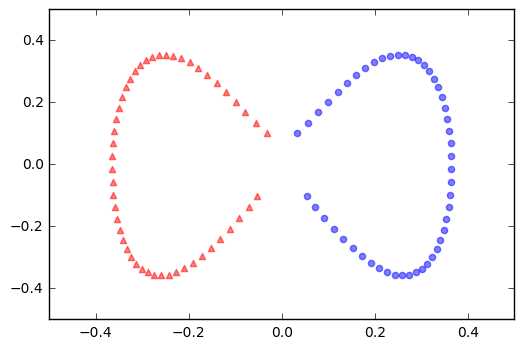

In [287]:
from sklearn.decomposition import KernelPCA

scikit_kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_skernpca=scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

## LOADING BREAST CANCER WISCONSIN DATASET

In [288]:
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

df = pd.read_csv('wdbc.txt', header=None, sep=',')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [289]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values


In [290]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [291]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [292]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

## COMBINING TRANSFORMERS AND ESTIMATORS IN A PIPELINE

In [293]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [294]:
pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression(random_state=1))])

In [295]:
pipe_lr.fit(X_train,y_train)

#training accuracy
print(pipe_lr.score(X_train,y_train))

#testing accuracy
print(pipe_lr.score(X_test,y_test))


0.953846153846
0.947368421053


## K FOLD CROSS VALIDATION

In [296]:
df.groupby([1]).size()

1
B    357
M    212
dtype: int64

In [297]:
np.bincount(y_train)

array([285, 170], dtype=int64)

In [298]:
#stratified K fold CV

from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y_train, n_folds=10, random_state=1)

scores=[]

for k,(train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score=pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print ('Fold: %s, Class dist.: %s, Acc: %.3f' %(k+1, np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [299]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy: 0.950 +/- 0.029


In [300]:
#Alternative and effective way for stratified K fold CV


from sklearn.cross_validation import cross_val_score


scores = cross_val_score(pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [301]:
scores

array([ 0.89,  0.98,  0.98,  0.91,  0.93,  0.98,  0.93,  0.96,  0.98,  0.96])

In [302]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy: 0.950 +/- 0.029


## DIAGNOSING BIAS AND VARIANCE PROBLEMS WITH LEARNING CURVES

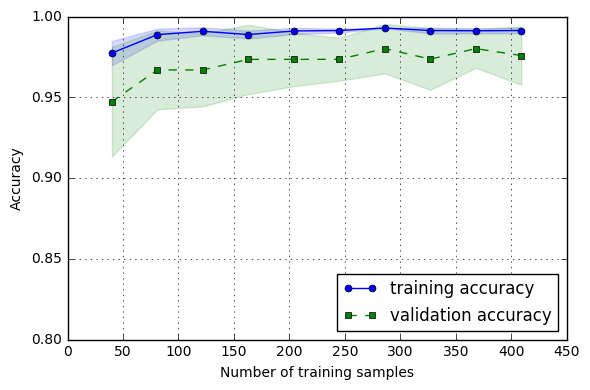

In [303]:
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [304]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

In [305]:
y_train.size

455

In [306]:
print train_scores

[[ 1.    0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97  0.97]
 [ 1.    0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.98  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 1.    0.99  0.99  1.    0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]
 [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99]]


In [307]:
np.mean(train_scores, axis=1)

array([ 0.98,  0.99,  0.99,  0.99,  0.99,  0.99,  0.99,  0.99,  0.99,  0.99])

## ADDRESSING OVERFITTING AND UNDERFITTING WITH VALIDATION CURVES

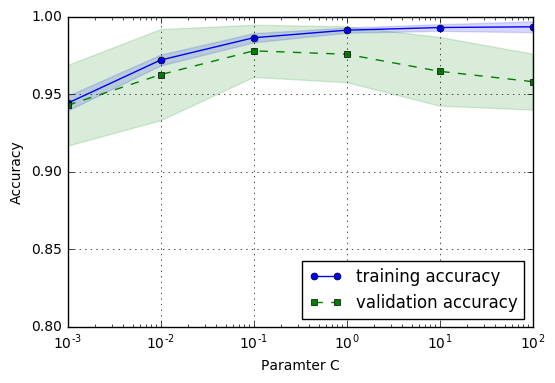

In [308]:
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='clf__C',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Paramter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [309]:
pipe_lr.get_params().keys()

['clf__solver',
 'scl',
 'scl__copy',
 'clf__max_iter',
 'clf__warm_start',
 'clf__multi_class',
 'clf__random_state',
 'clf__tol',
 'clf',
 'clf__verbose',
 'clf__dual',
 'steps',
 'clf__fit_intercept',
 'scl__with_mean',
 'clf__intercept_scaling',
 'clf__n_jobs',
 'clf__penalty',
 'clf__C',
 'clf__class_weight',
 'scl__with_std']

In [310]:
train_scores.shape

(6L, 10L)

## TUNING HYPERPARAMETERS VIA GRID SEARCH

In [311]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

pipe_svc=Pipeline([('scl',StandardScaler()),
                  ('clf',SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid=[{'clf__C': param_range,
             'clf__kernel': ['linear']},
            {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring="accuracy",
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

In [312]:
print gs.best_score_
print gs.best_params_

0.978021978022
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [313]:
print gs.best_estimator_

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])


In [314]:
clf=gs.best_estimator_
clf.fit(X_train, y_train)
print ('Test accuracy: %.3f' %(clf.score(X_test, y_test)))

Test accuracy: 0.965


In [315]:
pipe_svc.get_params().keys()

['clf__probability',
 'scl',
 'scl__copy',
 'clf__max_iter',
 'clf__cache_size',
 'clf__tol',
 'clf__degree',
 'clf',
 'clf__coef0',
 'clf__verbose',
 'clf__gamma',
 'clf__class_weight',
 'clf__random_state',
 'scl__with_mean',
 'steps',
 'scl__with_std',
 'clf__C',
 'clf__shrinking',
 'clf__decision_function_shape',
 'clf__kernel']

## ALGORITHM SELECTION WITH NESTED CROSS-VALIDATION

In [316]:
gs1 = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring="accuracy",
                  cv=5,
                  n_jobs=-1)

scores = cross_val_score(gs1, X=X_train, y=y_train, scoring='accuracy',cv=5, n_jobs=-1)

print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy: 0.978 +/- 0.012


In [317]:
from sklearn.tree import DecisionTreeClassifier

gs2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                  scoring="accuracy",
                  cv=5,
                  n_jobs=-1)
                  
scores = cross_val_score(gs2, X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)
                  
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy: 0.908 +/- 0.045


In [318]:
gs1.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__kernel': ['linear']}, {'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [319]:
gs1.best_score_

0.97802197802197799

In [320]:
gs1.best_params_

{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}

In [321]:
clf = gs1.best_estimator_

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.96491228070175439

## LOOKING AT DIFFERENT PERFORMANCE EVALUATION METRICS

In [322]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)
y_pred=pipe_svc.predict(X_test)

confmat=confusion_matrix(y_test,y_pred)
print confmat

[[71  1]
 [ 2 40]]


In [323]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

print('The Precision score is: {0:.3f}'.format(precision_score(y_test,y_pred)))
print('The Recall score is: {0:.3f}'.format(recall_score(y_test,y_pred)))
print('The F1 score is: {0:.3f}'.format(f1_score(y_test,y_pred)))
print('ROC AUC is: {0:.3f}'.format(roc_auc_score(y_test,y_pred)))


The Precision score is: 0.976
The Recall score is: 0.952
The F1 score is: 0.964
ROC AUC is: 0.969


In [324]:
from sklearn.metrics import roc_auc_score
print('ROC AUC is: {0:.3f}'.format(roc_auc_score(y_test,y_pred)))



ROC AUC is: 0.969


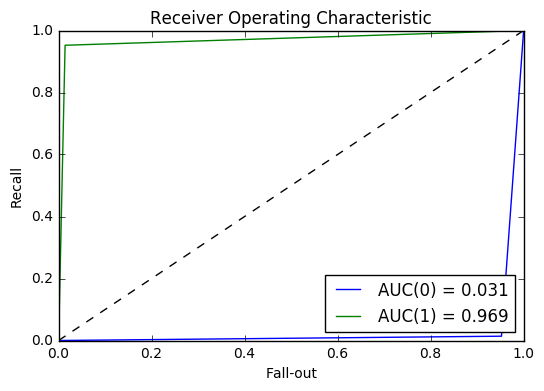

In [325]:
from sklearn.metrics import auc,roc_curve

for label in np.arange(2):
    false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred, pos_label=label)
    roc_auc = auc(false_positive_rate, recall)
    plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.3f' % (label, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()



In [326]:
roc_auc

0.96924603174603174

In [327]:
#construct our own scorer

from sklearn.metrics import make_scorer, f1_score

scorer=make_scorer(f1_score,pos_label=0)

gs=GridSearchCV(estimator=pipe_svc,
               param_grid=param_grid,
               scoring=scorer,
               cv=10)


## THE SCORING METRICS FOR MULTICLASS CLASSIFICATION

In [328]:
from sklearn.metrics import make_scorer

make_scorer(score_func=precision_score,
           pos_label=1,
           greater_is_better=True,
           average='micro')

make_scorer(precision_score, average=micro, pos_label=1)

## COMBINING DIFFERENT ALGORITHMS FOR CLASSIFICATION WIT/H MAJORITY VOTE (STACKING)

In [329]:
from sklearn.ensemble import VotingClassifier

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.5, 
                        random_state=1)


In [330]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001, 
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1, 
                              criterion='entropy', 
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1, 
                            p=2, 
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC: 0.92 (+/- 0.15) [Decision Tree]
ROC AUC: 0.93 (+/- 0.10) [KNN]


In [331]:
eclf1 = VotingClassifier(estimators=[('lr', pipe1),
                                     ('dt', clf2),
                                     ('knn', pipe3)],
                                     voting='soft')



clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN', 'Majority Voting']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, eclf1], clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))


10-fold cross validation:

ROC AUC: 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC: 0.92 (+/- 0.15) [Decision Tree]
ROC AUC: 0.93 (+/- 0.10) [KNN]
ROC AUC: 0.97 (+/- 0.10) [Majority Voting]


In [332]:
#evaluating the models on test set
from sklearn.metrics import roc_auc_score

for clf, label in zip([pipe1, clf2, pipe3, eclf1], clf_labels):
    y_pred=clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
    
    print("Test ROC AUC: %0.2f [%s]" 
               % (roc_auc_score(y_test,y_pred), label))


Test ROC AUC: 0.92 [Logistic Regression]
Test ROC AUC: 0.89 [Decision Tree]
Test ROC AUC: 0.86 [KNN]
Test ROC AUC: 0.95 [Majority Voting]


## TUNING THE ENSEMBLE CLASSIFIER VIA GRID SEARCH

In [333]:
eclf1.get_params()

{'dt': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'dt__class_weight': None,
 'dt__criterion': 'entropy',
 'dt__max_depth': 1,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__presort': False,
 'dt__random_state': 0,
 'dt__splitter': 'best',
 'estimators': [('lr',
   Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False)]])),
  ('dt',
   DecisionTree

In [334]:
from sklearn.grid_search import GridSearchCV

params=[{'dt__max_depth': [1,2], 'lr__clf__C': [0.001, 0.1, 100.0]}]

grid = GridSearchCV(estimator=eclf1,
                  param_grid=params,
                  scoring="roc_auc",
                  cv=10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=VotingClassifier(estimators=[('lr', Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0...ki',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')]]))],
         voting='soft', weights=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'lr__clf__C': [0.001, 0.1, 100.0], 'dt__max_depth': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [335]:
grid.grid_scores_

[mean: 0.96667, std: 0.10000, params: {'lr__clf__C': 0.001, 'dt__max_depth': 1},
 mean: 0.96667, std: 0.10000, params: {'lr__clf__C': 0.1, 'dt__max_depth': 1},
 mean: 1.00000, std: 0.00000, params: {'lr__clf__C': 100.0, 'dt__max_depth': 1},
 mean: 0.96667, std: 0.10000, params: {'lr__clf__C': 0.001, 'dt__max_depth': 2},
 mean: 0.96667, std: 0.10000, params: {'lr__clf__C': 0.1, 'dt__max_depth': 2},
 mean: 1.00000, std: 0.00000, params: {'lr__clf__C': 100.0, 'dt__max_depth': 2}]

In [336]:
grid.best_score_

1.0

In [337]:
grid.best_params_

{'dt__max_depth': 1, 'lr__clf__C': 100.0}

In [338]:
clfx=grid.best_estimator_
y_pred=clfx.fit(X_train,y_train).predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.96590909090909105

## BAGGING - BUILDING AN ENSEMBLE OF CLASSIFIERS FROM BOOTSTRAP SAMPLES

In [339]:
import pandas as pd
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine = pd.read_csv('wine.txt', sep=',',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = df_wine[df_wine['Class label'] != 1]
y=df_wine['Class label'].values
X=df_wine[['Alcohol', 'Hue']].values

In [340]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.4, 
                        random_state=1)


In [341]:
#unpruned decision tree

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=0)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

tree_train=accuracy_score(y_train,y_train_pred)
tree_test=accuracy_score(y_test,y_test_pred)

print('Decision tree train/test accuracies: %0.3f/%0.3f' %(tree_train,tree_test))

Decision tree train/test accuracies: 1.000/0.833


In [342]:
#bagging classifier

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=-1,
                        random_state=1
                       )

In [343]:
bag.fit(X_train,y_train)

y_train_pred=bag.predict(X_train)
y_test_pred=bag.predict(X_test)

tree_train=accuracy_score(y_train,y_train_pred)
tree_test=accuracy_score(y_test,y_test_pred)

print('Bagging train/test accuracies: %0.3f/%0.3f' %(tree_train,tree_test))

Bagging train/test accuracies: 1.000/0.896


## LEVERAGING WEAK LEARNERS VIA ADAPTIVE BOOSTING

In [344]:
#pruned decision tree

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)

tree.fit(X_train,y_train)

y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

tree_train=accuracy_score(y_train,y_train_pred)
tree_test=accuracy_score(y_test,y_test_pred)

print('Decision tree train/test accuracies: %0.3f/%0.3f' %(tree_train,tree_test))

Decision tree train/test accuracies: 0.845/0.854


In [345]:
#bagging classifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=tree,
                        n_estimators=500,
                        learning_rate=0.1,
                        random_state=0)

In [346]:
ada.fit(X_train,y_train)

y_train_pred=ada.predict(X_train)
y_test_pred=ada.predict(X_test)

ada_train=accuracy_score(y_train,y_train_pred)
ada_test=accuracy_score(y_test,y_test_pred)

print('AdaBoost train/test accuracies: %0.3f/%0.3f' %(ada_train,ada_test))

AdaBoost train/test accuracies: 1.000/0.875


## APPLYING MACHINE LEARNING TO SENTIMENT ANALYSIS

In [347]:
import pyprind
import pandas as pd
import os

# change the `basepath` to the directory of the
# unzipped movie dataset

#basepath = '/Users/Sebastian/Desktop/aclImdb/'
basepath = './aclImdb'

labels = {'pos':1, 'neg':0}
pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

ImportError: No module named pyprind

In [ ]:
df.head()

In [ ]:
#shuffling the df since assembled df is sorted

import numpy as np
np.random.seed(0)
df=df.reindex(np.random.permutation(df.index))
df.to_csv('./movie_data.csv', index=False)

In [348]:
df=pd.read_csv('movie_data.csv')
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


## Introducing the bag-of-words model
...

### Transforming documents into feature vectors

In [349]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining and the weather is sweet'])
bag = count.fit_transform(docs)

In [350]:
print(count.vocabulary_)

{u'and': 0, u'weather': 6, u'sweet': 4, u'sun': 3, u'is': 1, u'the': 5, u'shining': 2}


In [351]:
bag

<3x7 sparse matrix of type '<type 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [352]:
bag.toarray()

array([[0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 1, 1],
       [1, 2, 1, 1, 1, 2, 1]], dtype=int64)

In [353]:
count

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Assessing word relevancy via term frequency-inverse document frequency

In [354]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)

print(tfidf.fit_transform(bag).toarray())

[[ 0.    0.43  0.56  0.56  0.    0.43  0.  ]
 [ 0.    0.43  0.    0.    0.56  0.43  0.56]
 [ 0.4   0.48  0.31  0.31  0.31  0.48  0.31]]


## learning regex

In [356]:
import re

Nameage = '''
Janice is 22 and Theon is 33
Gabriel is 44 and Joey is 21
'''

ages=re.findall('\d{1,3}', Nameage)
Names=re.findall('[A-Z][a-z]*', Nameage)

In [357]:
print ages
print Names

['22', '33', '44', '21']
['Janice', 'Theon', 'Gabriel', 'Joey']


In [358]:
str="we need to inform him with the latest information"

allinform = re.findall("inform", str)

for i in allinform:
    print i

inform
inform


In [359]:
alliter=re.finditer("inform", str)

for i in alliter:
    loctup=i.span()
    print loctup

(11, 17)
(38, 44)


In [360]:
#match series of range of characters

str="Sat, hat, mat, pat"

allstr=re.findall("[Shmp]at", str)

for i in allstr:
    print i

Sat
hat
mat
pat


In [361]:
somestr=re.findall("[h-m]at", str)

for i in somestr:
    print i

hat
mat


In [362]:
# ^ indicates everything apart from specified

somestr=re.findall("[^h-m]at", str)

for i in somestr:
    print i

Sat
pat


In [363]:
#replace a string

food="hat rat mat pat"

regex=re.compile("[h-m]at")

food_new=regex.sub("food",food)

food_new

'food rat food pat'

In [364]:
randstr="here is \\drogba"

print randstr

#this is back slash problem. To solve we need to use re.search

print(re.search(r"\\drogba", randstr))

here is \drogba


In [365]:
randstr='''
Keep the blue flag
flying high
Chelsea

'''

print randstr


regex=re.compile("\n")

randstr_new=regex.sub(" ", randstr)

print randstr_new


Keep the blue flag
flying high
Chelsea


 Keep the blue flag flying high Chelsea  


In [374]:
randstr="12345"

print re.findall("\d", randstr)

print re.findall("\D", randstr)

print re.findall("\d[3]", randstr)

['1', '2', '3', '4', '5']
[]
['23']


In [367]:
num = "123 1234 12345 123456 1234567"

print re.findall("\d{5,7}", num)

['12345', '123456', '1234567']


In [368]:
num = "987 2091 83845 920460 873841"

print re.findall("\d{5,7}", num)

['83845', '920460', '873841']


In [369]:
# \w [a-zA-Z0-9_]
# \W [^a-zA-Z0-9]
# \d [0-9]
# \d [^0-9]

phn="412-555-1212"

if re.search("\d{3}-\d{3}-\d{4}", phn):
    print ('it is a phone number')
else:
    print ('not a phone number')

it is a phone number


In [370]:
# \s [\f\n\r\t\v]
# \S [^\f\n\r\t\v]

name='''
Bharadwaj
Tadikonda

'''
if re.search("\w{2,20}\s\w{2,20}", name):
    print ('valid name')
else:
    print ('invalid name')

valid name


In [382]:
email='bharadwaj.ananda2000@gmail.com bhar@.com @gmail.com bharadwaj@gmail.com'

re.findall("[\w._%+-]{2,20}@[\w-]{2,20}.[A-Za-z]{2,3}", email)

['bharadwaj.ananda2000@gmail.com', 'bharadwaj@gmail.com']

In [372]:
ph='(012)200-3000 (22)394-9489 (121)271-2770'

pdata=re.findall("\(\d{3}\)\d{3}-\d{4}",ph)

for i in pdata:
    print i

(012)200-3000
(121)271-2770


## Cleaning text data

In [383]:
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [411]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower())+ ' '.join(emoticons).replace('-', '')
    return text


print preprocessor('is seven.<br /><br />Title (Brazil): Not Available')
print preprocessor("</a>This :) is :( a test :-)!")

is seven title brazil not available
this is a test :) :( :)


In [412]:
#apply our preprocessor function to all movie reviews in our DataFrame

df['review'] = df['review'].apply(preprocessor)

In [413]:
df.head(3)

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0


In [415]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]


In [416]:
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [417]:
tokenizer_porter('runners like running and thus they run')

[u'runner', u'like', u'run', u'and', u'thu', u'they', u'run']

In [426]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [422]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:] if w not in stop]

LookupError: 
**********************************************************************
  Resource u'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'D:\\Users\\bharadwaj/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'D:\\Users\\bharadwaj\\AppData\\Local\\Continuum\\Anaconda2\\nltk_data'
    - 'D:\\Users\\bharadwaj\\AppData\\Local\\Continuum\\Anaconda2\\lib\\nltk_data'
    - 'D:\\Users\\bharadwaj\\AppData\\Roaming\\nltk_data'
**********************************************************************

## TRAINING A LOGISTIC REGRESSION MODEL FOR DOCUMENT CLASSIFICATION

In [ ]:
#1. df is first loaded and shuffled
#2. cleaning of df is done:
    #a. HTML markup removed
    #b. Emoticons extracted
    #c. Non word characters are spaced out
    #d. Conversion to lower case
    #e. Emoticons added at end
    #f. Nose character "-" removed from emoticons for consistency
#3. Now the df is ready for modelling

In [427]:
X_train=df.loc[:25000,'review'].values
y_train=df.loc[:25000,'sentiment'].values
X_test=df.loc[25000:,'review'].values
y_test=df.loc[25000:,'sentiment'].values

In [433]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False, 
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1,1)],
               #'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
             {'vect__ngram_range': [(1,1)],
               #'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
             ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, 
                           scoring='accuracy',
                           cv=5, verbose=1,
                           n_jobs=-1)

In [431]:
lr_tfidf.get_params().keys()

['vect__smooth_idf',
 'clf__max_iter',
 'clf__warm_start',
 'clf__multi_class',
 'clf__verbose',
 'clf__random_state',
 'clf__intercept_scaling',
 'vect__norm',
 'clf__n_jobs',
 'clf__penalty',
 'vect__analyzer',
 'vect__max_df',
 'clf__tol',
 'clf',
 'vect__lowercase',
 'vect__binary',
 'vect__stop_words',
 'vect__encoding',
 'vect__max_features',
 'vect__dtype',
 'vect__strip_accents',
 'vect__sublinear_tf',
 'clf__dual',
 'steps',
 'vect',
 'vect__min_df',
 'vect__tokenizer',
 'vect__use_idf',
 'clf__C',
 'vect__input',
 'vect__ngram_range',
 'clf__solver',
 'vect__preprocessor',
 'vect__vocabulary',
 'clf__fit_intercept',
 'vect__decode_error',
 'clf__class_weight',
 'vect__token_pattern']

In [ ]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [430]:
print(gs_lr_tfidf.best_params_)

In [ ]:
print(gs_lr_tfidf.best_score_)

In [ ]:
clf=gs_lr_tfidf.best_estimator_

## PREDICTING CONTINUOUS TARGET VARIABLES WITH REGRESSION ANALYSIS

In [3]:
import pandas as pd
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
 #                header=None, sep='\s+')
df = pd.read_csv('housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003151ACC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000032955CC0>]], dtype=object)

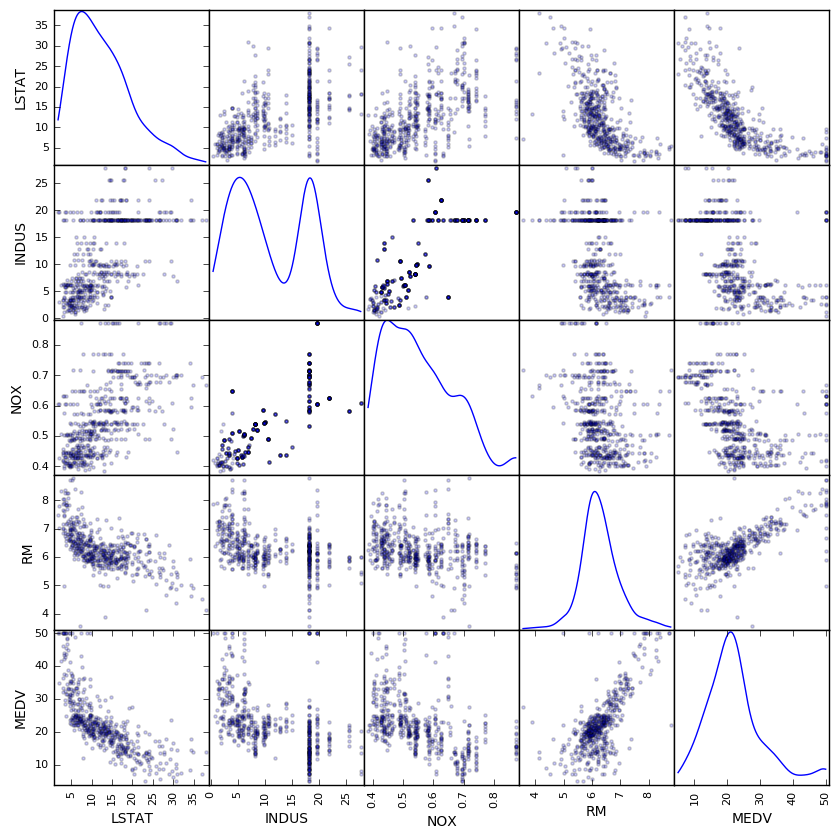

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
cols=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatter_matrix(df[cols], alpha=0.2, figsize=(10, 10), diagonal='kde')

In [ ]:
#alternate

import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

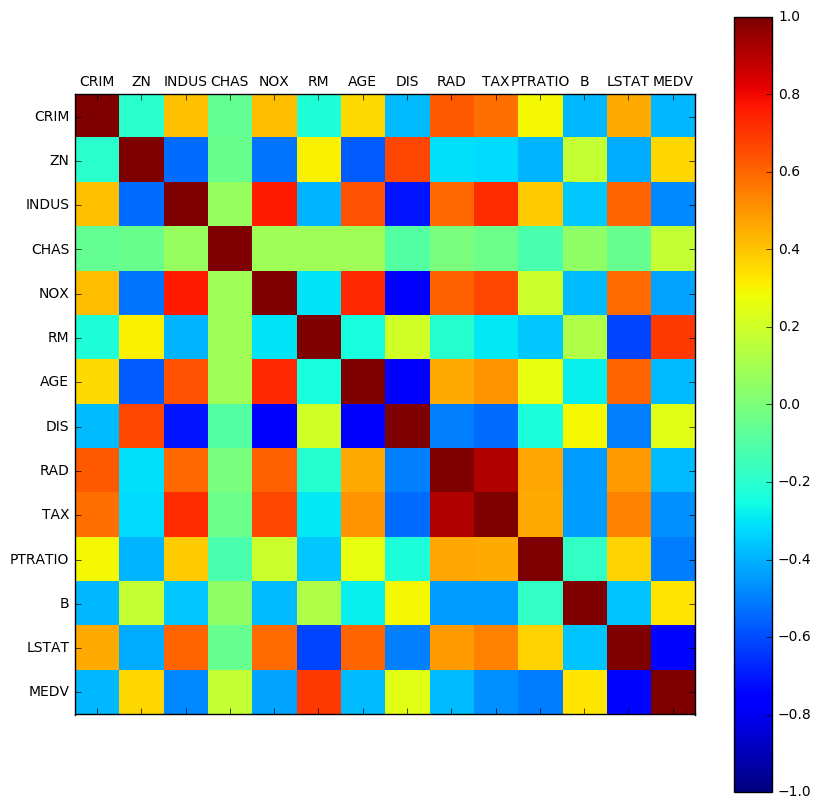

In [51]:
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax=ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(len(df.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df.columns))
ax.set_yticklabels(list(df.columns))
plt.show()

In [ ]:
#alternate

import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [54]:
df.corrwith(df['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
dtype: float64